In [21]:
# importing libraries
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf

In [4]:
(train_img,train_labels), (test_img,test_labels) = mnist.load_data()

In [7]:
train_img.shape

(60000, 28, 28)

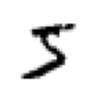

In [15]:
plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(train_img[0],cmap=plt.cm.binary)
plt.show()

In [16]:
from keras.models import Sequential
from keras.layers import Dense

network = Sequential()
network.add(Dense(512,activation='relu',input_shape=(28*28,)))
network.add(Dense(10,activation='softmax'))

In [17]:
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
train_img = train_img.reshape((60000,28*28))
train_img = train_img.astype('float32')/255

test_img = test_img.reshape((10000,28*28))
test_img = test_img.astype('float32')/255

In [24]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
network.fit(train_img,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 5ms/step - loss: 0.2706 - accuracy: 0.9229
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1108 - accuracy: 0.9676
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0711 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0371 - accuracy: 0.9895


In [26]:
test_loss, test_acc = network.evaluate(test_img,test_labels)
print(test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0665 - accuracy: 0.9801
0.9800999760627747
